In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
import pickle
import skvideo.io

In [36]:
def parse_log(log_files):
    result = {}
    for log in log_files:
        with open(log, 'r') as f:
            lines = f.readlines()
        vw = log.split('/')[-1].split('.log')[0].split(".txt")[0]
        print(vw)
        vw = round(float(vw), 2)
        lines = [lines[-2].strip(), lines[-1].strip()]
        lines = ' '.join(lines)
        print(lines)
        maps = lines.split('[')[1].split(']')[0].split(" ")
        maps = [float(m) for m in maps if m != '']
        result[vw] = maps
    
    # to csv
    df = pd.DataFrame(result)
    # add row mean
    df.loc['mean(mAP)'] = df.mean()
    for i in range(7):
        df = df.rename(index={i: f'tIoU={round((i+1)*0.1, 1)}'})
    return result, df

In [34]:
df2
# organize by the first row
df2 = df2.T                              
df2 = df2.sort_values(by='mean(mAP)', axis=0, ascending=False)

KeyError: 'mean(mAP)'

In [35]:
df2

,0.24,0.30,0.28,0.26,0.32,0.22,0.34,0.40,0.36,0.20,0.50,0.60,0.10
tIoU=0.1,79.888639,79.649157,79.576604,79.452379,79.170940,79.295949,78.673816,78.613829,78.303530,77.400073,77.447904,71.118382,54.860675
tIoU=0.2,77.506082,77.285392,77.200889,77.066412,76.798706,76.955586,76.342281,76.190459,75.926376,75.141971,74.971215,68.892335,53.336183
tIoU=0.3,71.100658,70.897440,70.821768,70.666024,70.491617,70.242703,70.042235,69.887392,69.536094,68.622783,68.614168,63.544156,48.297037
tIoU=0.4,63.635510,63.513289,63.371471,63.199964,63.105117,62.976657,62.777959,62.532035,62.406707,61.610141,61.090405,56.687695,42.974105
tIoU=0.5,58.122254,57.945448,57.802246,57.669479,57.551090,57.622541,57.253573,57.197633,57.091691,56.348135,55.851135,52.261163,39.521436
tIoU=0.6,47.029231,47.079658,46.946228,46.814942,46.749955,46.877463,46.460128,46.304250,46.284305,45.827202,45.432492,42.416810,32.438044
tIoU=0.7,33.105161,33.249114,33.128776,33.011952,33.014874,32.736756,32.762739,32.628265,32.602516,31.983880,32.112083,30.826482,22.575056
mean(mAP),61.483934,61.374214,61.263997,61.125879,60.983186,60.958236,60.616105,60.479123,60.307317,59.562026,59.359915,55.106718,42.000362


In [49]:
logs = '../outputs/diff_threshold/{vw}.txt'
files = os.listdir('../outputs/diff_threshold/')
logs = [os.path.join('../outputs/diff_threshold/', f) for f in files if f.endswith('.txt')]
result, df2 = parse_log(logs)

0.3
mAP: [79.64915739 77.2853919  70.89744011 63.51328922 57.94544835 47.07965848 33.24911418]
0.26
mAP: [79.45237931 77.06641193 70.66602368 63.19996389 57.66947884 46.81494242 33.01195181]
0.4
mAP: [78.61382901 76.19045887 69.8873919  62.5320355  57.19763302 46.30425038 32.62826532]
0.32
mAP: [79.17094024 76.79870579 70.49161661 63.1051166  57.55108976 46.74995537 33.01487423]
0.1
mAP: [54.86067517 53.33618317 48.29703706 42.97410478 39.52143632 32.43804374 22.57505627]
0.23
mAP: [80.2281078  77.85700308 71.18388432 63.78692967 58.30697834 47.24812179 33.12592473]
0.2
mAP: [77.40007278 75.1419708  68.62278279 61.61014068 56.34813527 45.82720189 31.98388036]
0.24
mAP: [79.88863871 77.50608214 71.10065794 63.63551049 58.12225387 47.02923105 33.10516099]
0.22
mAP: [79.2959494  76.95558555 70.24270334 62.97665682 57.62254127 46.87746285 32.73675565]
0.5
mAP: [77.44790439 74.97121522 68.61416791 61.09040521 55.85113493 45.43249153 32.11208326]
0.34
mAP: [78.67381629 76.34228094 70.0422354

In [51]:
df2.sort_index()
df = df2.sort_index(axis=1)

In [27]:
def plot_curve(df, title):
    # plot mean mAP curve
    plt.plot(df.columns, df.loc['mean(mAP)'])
    plt.xlabel('confidence threshold')
    plt.ylabel('mean mAP')
    plt.title('mean mAP curve')
    # show digit (round to 2)
    plt.show()

In [52]:
df.sort_values(by='mean(mAP)', axis=1, ascending=False).sort_index()

,0.23,0.24,0.30,0.28,0.26,0.32,0.22,0.34,0.40,0.36,0.20,0.50,0.60,0.10
mean(mAP),61.676707,61.483934,61.374214,61.263997,61.125879,60.983186,60.958236,60.616105,60.479123,60.307317,59.562026,59.359915,55.106718,42.000362
tIoU=0.1,80.228108,79.888639,79.649157,79.576604,79.452379,79.170940,79.295949,78.673816,78.613829,78.303530,77.400073,77.447904,71.118382,54.860675
tIoU=0.2,77.857003,77.506082,77.285392,77.200889,77.066412,76.798706,76.955586,76.342281,76.190459,75.926376,75.141971,74.971215,68.892335,53.336183
tIoU=0.3,71.183884,71.100658,70.897440,70.821768,70.666024,70.491617,70.242703,70.042235,69.887392,69.536094,68.622783,68.614168,63.544156,48.297037
tIoU=0.4,63.786930,63.635510,63.513289,63.371471,63.199964,63.105117,62.976657,62.777959,62.532035,62.406707,61.610141,61.090405,56.687695,42.974105
tIoU=0.5,58.306978,58.122254,57.945448,57.802246,57.669479,57.551090,57.622541,57.253573,57.197633,57.091691,56.348135,55.851135,52.261163,39.521436
tIoU=0.6,47.248122,47.029231,47.079658,46.946228,46.814942,46.749955,46.877463,46.460128,46.304250,46.284305,45.827202,45.432492,42.416810,32.438044
tIoU=0.7,33.125925,33.105161,33.249114,33.128776,33.011952,33.014874,32.736756,32.762739,32.628265,32.602516,31.983880,32.112083,30.826482,22.575056


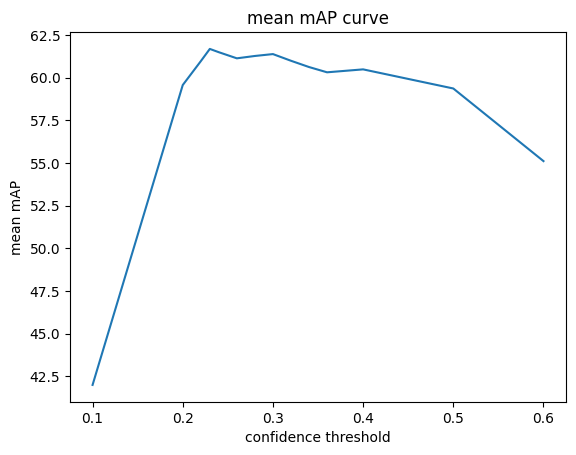

In [53]:
plot_curve(df, 'mean mAP curve')